In [1]:
import os, sys
sys.path.append('CommonUtils/')
import CommonUtils as cu

import argparse, math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

In [10]:
df=pd.read_csv("df.csv")

In [11]:
df

,Unnamed: 0,bincenters,ymean,xerr,yerr
0,1,0.152301,-1.636795,0.145026,0.136972
1,2,0.442353,-1.315822,0.145026,0.138025
2,3,0.732404,-1.444979,0.145026,0.136087
3,4,1.022456,-1.299704,0.145026,0.132262
4,5,1.312507,-1.147867,0.145026,0.131823
5,6,1.602559,-1.098057,0.145026,0.129799
6,7,1.892610,-1.149864,0.145026,0.127600
7,8,2.182661,-1.218846,0.145026,0.129154
8,9,2.472713,-1.331864,0.145026,0.128183
9,10,2.762764,-1.287945,0.145026,0.130300


In [12]:
# df.info()

In [13]:
# df.describe()

In [14]:
x=df['bincenters']
y=df['ymean']
x_err=df['xerr']
y_err=df['yerr']

# print(x, y, x_err, y_err)

#### Define $y(x) = A\sin(bx)+c$

In [15]:
def sin_unblinded(x, A, b, c):
    return A * np.sin(b * x)+c

#function, X, Y, [starting par]
params, params_covariance = optimize.curve_fit(sin_unblinded, x, y, p0=[0.22, 1.5, -0.1])

print(params)
print(params_covariance)

[ 0.29066969  0.68651207 -1.49913377]
[[ 0.01326457 -0.00225768 -0.00933905]
 [-0.00225768  0.00476893  0.00254582]
 [-0.00933905  0.00254582  0.0077702 ]]


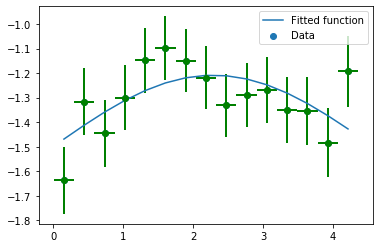

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.errorbar(x,y,xerr=x_err, yerr=y_err, linewidth=0, elinewidth=2, color="green", marker="o")
plt.plot(x, sin_unblinded(x, params[0], params[1], params[2]),label='Fitted function')
plt.legend(loc='best')
plt.savefig("testFit.png", dpi=300)
plt.show()

#add Chi2,
